<a href="https://colab.research.google.com/github/alperkara20/Stock-Market-Prediction/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [ ]:
#Get the yahoo stock data
df = web.DataReader('AAPL', data_source='yahoo', start='1980-12-08', end='2021-10-1')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.100600
1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.095352
1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.088353
1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600.0,0.090540
1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.093165
...,...,...,...,...,...,...
2021-09-27,145.960007,143.820007,145.470001,145.369995,74150700.0,145.369995
2021-09-28,144.750000,141.690002,143.250000,141.910004,108972300.0,141.910004
2021-09-29,144.449997,142.029999,142.470001,142.830002,74602000.0,142.830002


In [ ]:

#Get the number of rows and columns in the data set
df.shape

(10289, 6)

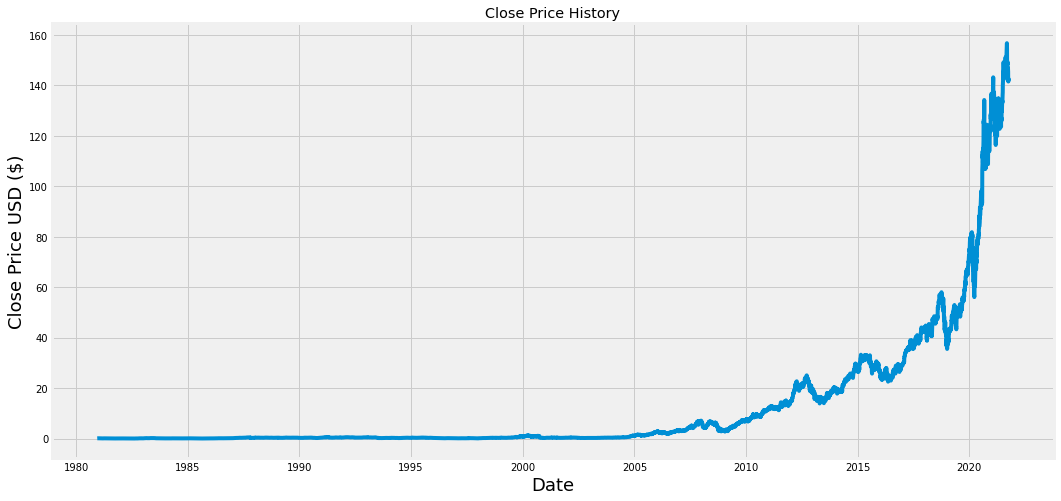

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

8232

In [ ]:
#Scale the data
#we scale the data and use minmax scaler as minmax scaler is sensitive to outliers

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[5.05876786e-04],
       [4.63129371e-04],
       [4.06126382e-04],
       ...,
       [9.11517356e-01],
       [9.03026586e-01],
       [9.10368180e-01]])

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.00050588, 0.00046313, 0.00040613, 0.00042394, 0.00044532,
       0.00049163, 0.00053081, 0.00056644, 0.00061275, 0.00069825,
       0.0007125 , 0.00068757, 0.00065907, 0.00066975, 0.00064838,
       0.00060563, 0.00056644, 0.00054863, 0.00059494, 0.00058782,
       0.00055576, 0.00055932, 0.00057713, 0.00057   , 0.00062344,
       0.00059494, 0.00061275, 0.00062344, 0.00061988, 0.00060563,
       0.0005985 , 0.00057   , 0.00053794, 0.00049163, 0.00044532,
       0.00047382, 0.00050231, 0.00050231, 0.00050588, 0.00046313,
       0.00046313, 0.00043819, 0.00043106, 0.00041325, 0.00043106,
       0.00046313, 0.00041681, 0.00037763, 0.00038831, 0.00036338,
       0.00040613, 0.00041681, 0.00044176, 0.00044532, 0.00043463,
       0.0004275 , 0.00042394, 0.00041681, 0.00035982, 0.00032775])]
[0.00030281361836608363]

[array([0.00050588, 0.00046313, 0.00040613, 0.00042394, 0.00044532,
       0.00049163, 0.00053081, 0.00056644, 0.00061275, 0.00069825,
       0.0007125 , 0.00068757, 0

In [ ]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(8172, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# we use the optimiser as adam and loss as mean squared error
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

8172/8172 [==============================] - 228s 28ms/step - loss: 2.2327e-05


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)


In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

3.3391373246927905

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


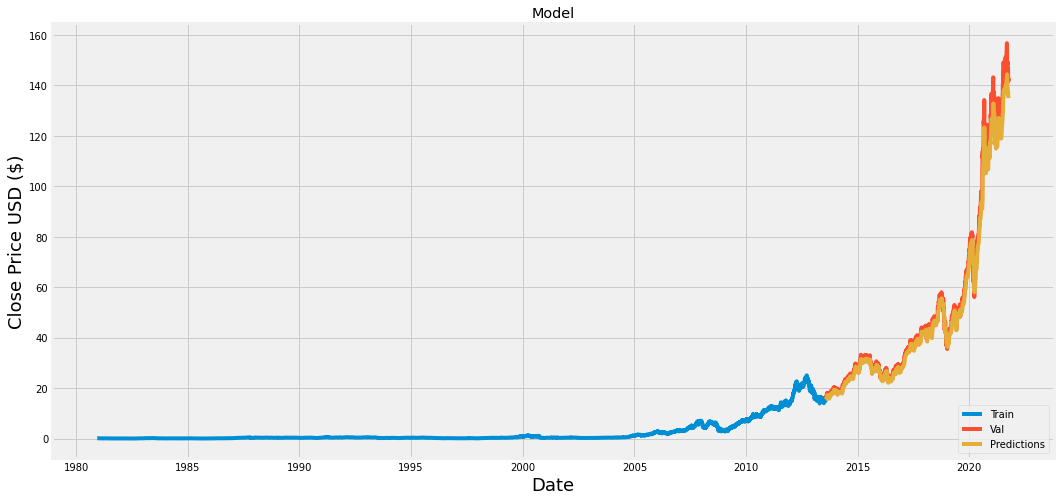

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2013-08-02,16.519285,15.412057
2013-08-05,16.766071,15.543887
2013-08-06,16.616072,15.706397
2013-08-07,16.606428,15.803506
2013-08-08,16.464643,15.855611
...,...,...
2021-09-27,145.369995,137.298325
2021-09-28,141.910004,137.261261
2021-09-29,142.830002,136.353302


In [ ]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[67.1833]]


In [ ]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    69.934998
Name: Close, dtype: float64
